<a href="https://colab.research.google.com/github/MarkTDrummond/BUAN-6545-Machine-Learning-for-Predictive-Analysis/blob/main/Mark_Drummond_Mini_project_1_baseball_analytics_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project #1: Baseball Analytics

The overall purpose of this mini-project is to predicting MLB wins per season by modeling data to KMeans clustering model and linear regression models.

## Part 1: Data Import and Handling

In this tutorial, you’ll see how you can easily load in data from a database with `sqlite3`, how you can explore your data and improve its data quality with pandas and matplotlib, and how you can then use the `Scikit-Learn` package to extract some valid insights out of your data.

You will read in the data by querying a `sqlite` database using the sqlite3 package and converting to a DataFrame with pandas. Your data will be filtered to only include currently active modern teams and only years where the team played `150` or more games.

### Import Data

In [ ]:
# importing pandas and sqlite3 packages
import pandas as pd
import sqlite3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#connecting the sqlite database to the notebook
# to be updated
#conn = sqlite3.connect(“/content/drive/My Drive/Classroom/BUAN 6545: Machine Learning for Predictive Analysis 01/lahman2016.sqlite”)
conn = sqlite3.connect("/content/drive/My Drive/Classroom/BUAN 6545: Machine Learning for Predictive Analysis 01/Mark Drummond - lahman2016.sqlite")

In [ ]:
#Writing the SQL query to select the teams which have played more than 150 games and are still active
query = '''select * from Teams
inner join TeamsFranchises on Teams.franchID == TeamsFranchises.franchID
where Teams.G >= 150 and TeamsFranchises.active== 'Y';  '''


#Executing the query 
Teams = conn.execute(query).fetchall()

In [ ]:
# Converting the result into a Pandas dataframe 
#### Complete the code block below
#### create a df called `df_raw' and from the data `Teams`
df_raw = pd.DataFrame(Teams)


#### display the first 10 rows of `df_raw`
df_raw.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,None,None,N,N,744,5424,1331,218,22,189,681,1068.0,37,28.0,NaN,NaN,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,Los Angeles Angels,Wrigley Field (LA),603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,None,None,N,N,718,5499,1377,232,35,137,602,917.0,46,27.0,NaN,NaN,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,Los Angeles Angels,Dodger Stadium,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,None,None,N,N,597,5506,1378,208,38,95,448,916.0,43,30.0,NaN,NaN,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,Los Angeles Angels,Dodger Stadium,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,None,None,N,N,544,5362,1297,186,27,102,472,920.0,49,39.0,NaN,NaN,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,Los Angeles Angels,Dodger Stadium,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,None,None,N,N,527,5354,1279,200,36,92,443,973.0,107,59.0,NaN,NaN,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,California Angels,Dodger Stadium,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None
5,1966,AL,CAL,ANA,None,6,162,81.0,80,82,None,None,N,N,604,5360,1244,179,54,122,525,1062.0,80,54.0,NaN,NaN,643,576,3.56,31,12,40,4371,1364,136,511,836,136,186.0,0.979,California Angels,Anaheim Stadium,1400321,97,97,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None
6,1967,AL,CAL,ANA,None,5,161,83.0,84,77,None,None,N,N,567,5307,1265,170,37,114,453,1021.0,40,36.0,NaN,NaN,587,507,3.19,19,14,46,4290,1246,118,525,892,111,135.0,0.982,California Angels,Anaheim Stadium,1317713,95,96,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None
7,1968,AL,CAL,ANA,None,8,162,81.0,67,95,None,None,N,N,498,5331,1209,170,33,83,447,1080.0,62,50.0,NaN,NaN,615,548,3.43,29,11,31,4311,1234,131,519,869,140,156.0,0.977,California Angels,Anaheim Stadium,1025956,95,97,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None
8,1969,AL,CAL,ANA,W,3,163,81.0,71,91,N,None,N,N,528,5316,1221,151,29,88,516,929.0,54,39.0,NaN,NaN,652,566,3.54,25,9,39,4314,1294,126,517,885,135,164.0,0.978,California Angels,Anaheim Stadium,758388,94,95,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None
9,1970,AL,CAL,ANA,W,3,162,81.0,86,76,N,None,N,N,631,5532,1391,197,40,114,447,922.0,69,27.0,NaN,NaN,630,565,3.48,21,10,49,4386,1280,154,559,922,127,169.0,0.980,California Angels,Anaheim Stadium,1077741,96,97,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


This is the standard process of reading data from a database (`sqlite`) to a `pandas` dataframe. 

Please note that it is a common practice reading data from enterprise systems - so please familiarize yourselves with this part.

### Data Cleaning

Prior to assessing the data quality, let’s first eliminate the columns that aren’t necessary or are derived from the target column (`Wins`). This is where knowledge of the data you are working with starts to become very valuable.

You should have noted that our dataframe (`df_Teams`) has no column names. Let's first define the column names.

In [ ]:
# Adding column names to dataframe
cols = ['yearID','lgID','teamID','franchID','divID','Rank','G','Ghome','W','L','DivWin','WCWin','LgWin','WSWin',
        'R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV','IPouts','HA',
        'HRA','BBA','SOA','E','DP','FP','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45',
        'teamIDretro','franchID','franchName','active','NAassoc']

#### Complete your code below
#### select columns in ``df_raw`` by ``cols`` in a new DF called ``df_Teams``
df_Teams = df_raw.copy() #columns = cols
df_Teams.columns = cols


#### display the first 5 rows of `df_Teams` 
#### you should see 52 columns
df_Teams.head(5)




,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,franchID,franchName,active,NAassoc
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,None,None,N,N,744,5424,1331,218,22,189,681,1068.0,37,28.0,NaN,NaN,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,Los Angeles Angels,Wrigley Field (LA),603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,None,None,N,N,718,5499,1377,232,35,137,602,917.0,46,27.0,NaN,NaN,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,Los Angeles Angels,Dodger Stadium,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,None,None,N,N,597,5506,1378,208,38,95,448,916.0,43,30.0,NaN,NaN,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,Los Angeles Angels,Dodger Stadium,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,None,None,N,N,544,5362,1297,186,27,102,472,920.0,49,39.0,NaN,NaN,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,Los Angeles Angels,Dodger Stadium,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,None,None,N,N,527,5354,1279,200,36,92,443,973.0,107,59.0,NaN,NaN,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,California Angels,Dodger Stadium,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


Some of the columns are not as useful as the others. So that we are going to delete them.

__Note__: what we are doing right now is part of __feature selection__, we have multiple ways of feature selection.

In [ ]:
# Dropping your unnecesary column variables.
drop_cols = ['lgID','franchID','divID','Rank','Ghome','L','DivWin','WCWin','LgWin','WSWin','SF','name','park',
             'attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active',
             'NAassoc']

#### drop columns contained in `drop_cols` from `df_Teams`
#### and save the remaining columns as `df`
df = df_Teams.drop(drop_cols,axis=1)

#### make sure that these columns are deleted by looking at the first 5 rows of `df`
#### you should see only 29 columns
df.head(5)
#df.columns


,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1961,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,28.0,NaN,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969
1,1962,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,27.0,NaN,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972
2,1963,LAA,161,70,597,5506,1378,208,38,95,448,916.0,43,30.0,NaN,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974
3,1964,LAA,162,82,544,5362,1297,186,27,102,472,920.0,49,39.0,NaN,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978
4,1965,CAL,162,75,527,5354,1279,200,36,92,443,973.0,107,59.0,NaN,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981


### Handling Missing Values

`2` of the columns have a relatively small amount of null values. There are `110` null values in the `SO` (Strike Outs) column and `22` in the DP (Double Play) column. Two of the columns have a relatively large amount of them. There are `419` null values in the `CS` (Caught Stealing) column and `1777` in the `HBP` (Hit by Pitch) column.

In [ ]:
#Identifying the number of null values in the dataframe
# Creating a for loop to display the column names and also their count of missing values 

#### complete the code below
#### create an empty list named `names` for columns names
names = []

#### create an empty list named `val` for # of null values in each column
val = []

#### create a for loop iterating each `col` through `df.columns`
for col in df.columns:
    #### add column name `col` to `names`
    # Adding the column name to the names list
    names.append(col)
    #### add # of null values to `val`
    #### you can get # of null values for column `c` as `df[c].isnull().sum()`
    # Adding the count of the missing values 
    val.append(df[col].isnull().sum()) 
    #### print out results as (column_name, # of null values in column_name)
    print(col,df[col].isnull().sum())
    #### Note that `col` is the current column_name in iteration
    #### and you should retrieve the # of null values in column_name as the last element in `val`
    #### hint: the last element in a list l is: l[-1]
   # Printing the column names and thier missing counts ie : 2 lists
print(names)
print(val)

yearID 0
teamID 0
G 0
W 0
R 0
AB 0
H 0
2B 0
3B 0
HR 0
BB 0
SO 110
SB 0
CS 419
HBP 1777
RA 0
ER 0
ERA 0
CG 0
SHO 0
SV 0
IPouts 0
HA 0
HRA 0
BBA 0
SOA 0
E 0
DP 22
FP 0
['yearID', 'teamID', 'G', 'W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 419, 1777, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0]


In [ ]:
df.columns

Index(['yearID', 'teamID', 'G', 'W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB',
       'SO', 'SB', 'CS', 'HBP', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts',
       'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP'],
      dtype='object')

We are going to drop two columns (`CS` and `HBP`) with too many missing values.

__NOTE__: even though we said that dropping columns with missing values is the __last resort__, the reason we are dropping the columns here is that because of the number of missing values, it will be very difficult for us to impute them in these two columns.

In [ ]:
#Dropping the columns with large number of null values


#### drop `CS` & `HBP` from `df`
#### and save the remaining as `df`
df.drop(['CS','HBP'], axis=1,inplace=True)

df.head(5)
len(df.columns)

#### check the first 5 rows of the new `df` to see 
#### if the two columns are successfully dropped
#### you should expect to see 27 columns now


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


27

With the two columns dropped, we can impute the missing values in the other two columns (`SO` and `DP`) since they have much less.

### Impute Missing Values

As a design decision, we decide to use `median` instead of `mean` to impute the missing values. Use the block below to answer __why we made that decision__.

There looks to be some outliers and the median is better suited for outliers

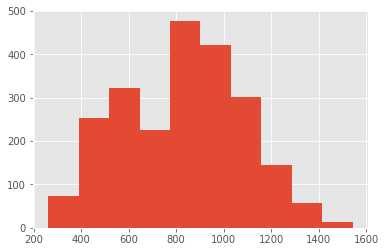

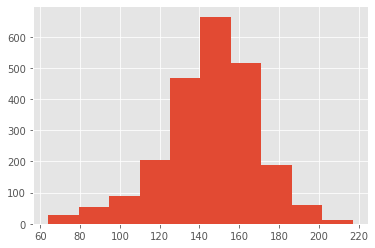

In [ ]:
plt.hist(df['SO'])
plt.show()
plt.hist(df['DP'])
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


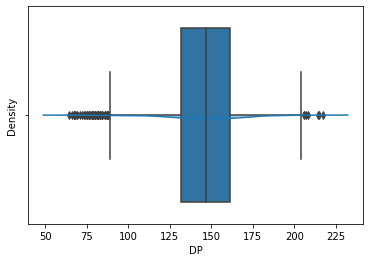

In [ ]:
import seaborn as sns
# Box plot
#sns.boxplot(df.SO)
# Distribution plot
#sns.distplot(df.SO)
# Box plot
sns.boxplot(df.DP)
# Distribution plot
sns.distplot(df.DP)

In [ ]:
print(df['SO'].describe())
print('Median :',df['SO'].median())
print('Skew :',df['SO'].skew(axis = 0, skipna = True) )
print(df['DP'].describe())
print('Median :',df['DP'].median())
print('Skew :',df['DP'].skew(axis = 0, skipna = True) )


count    2287.000000
mean      830.057280
std       251.453012
min       262.000000
25%       609.000000
50%       855.000000
75%      1012.500000
max      1543.000000
Name: SO, dtype: float64
Median : 855.0
Skew : -0.014118468759540877
count    2287.000000
mean      145.481417
std        23.568268
min        64.000000
25%       132.000000
50%       147.000000
75%       161.000000
max       217.000000
Name: DP, dtype: float64
Median : 147.0
Skew : -0.5144711561561641


In [ ]:
# Filling the missing values with the median of their respective column values
#### complete your code below
#### you can impute the missing values in a column using the `fillna()` function provided by `pandas`
#### fillna() works as `df[col].fillna(some_value)`, in this case the value is `df[col].median()`
#### NOTE that `col` above is the name of the column you want to impute
 
#df['SO'].fillna(df['SO'].median(),inplace=True)
#df['DP'].fillna(df['DP'].median(),inplace=True)

df.fillna({'SO':df['SO'].median(), 'DP':df['DP'].median()}, inplace=True)

#### Double-check if the null values are filled
#### you should see `0`s for all columns 
df.isna().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


yearID    0
teamID    0
G         0
W         0
R         0
AB        0
H         0
2B        0
3B        0
HR        0
BB        0
SO        0
SB        0
RA        0
ER        0
ERA       0
CG        0
SHO       0
SV        0
IPouts    0
HA        0
HRA       0
BBA       0
SOA       0
E         0
DP        0
FP        0
dtype: int64

There is an easier way of checking null values in a dataframe. You can use either way based on your preference.

In [ ]:
# Again checking for null values 
# if see any value which is not `0` that means you still have null values in your data
# in this case we are fine
#df.isnull().any()
df.isnull().sum().sum()



0

### Exploring and Visualizing The Data

Exploring your data using different types of visualizations is always a good practice when doing EDA.

You’ll start by plotting a histogram of the target column (`W`) so you can see the distribution of wins.

In [ ]:
#importing matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

#### the statement below ask matplotlib to use the 'ggplot' style
#### you should consider using that
plt.style.use('ggplot')

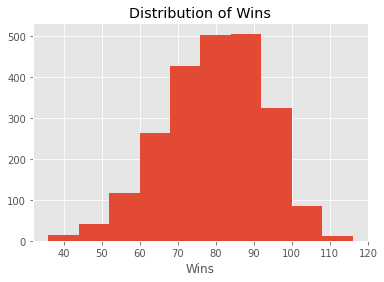

In [ ]:
#### Complete your code below
#### create a histogram `hist()` over the column `df['W']`
plt.hist(df['W'])

#### adding elements to your visualization to increase the readability
#### you should always have title and axis name(s) in your visualization
#### name your x-axis label as `Wins`
plt.xlabel('Wins')

#### name your visualization title as `Distribution of Wins`
plt.title("Distribution of Wins") 
  
#### show your visualization
plt.show()

In [ ]:
#### We can also check the descriptive stats of `df['W']` using `.describe()`
df['W'].describe()

count    2287.000000
mean       79.230433
std        13.045240
min        36.000000
25%        70.000000
50%        80.000000
75%        89.000000
max       116.000000
Name: W, dtype: float64

You should already know that `df['W']` is a __continuous__ field. 

__Answer this question__: When the target variable is continuous, what type of analysis are we doing (select from classification/clustering/regression), and why? __Use the block below to answer__.

Regression analysis would be the first model to try with a continuous dependent variable that is linear


One way to convert a continuous variable to categorical is through binning. You can bin your continuous variable using its distribution, any external knowledge, or some other logical reasons. But __be sure to include your reason in your analytical report__.

In [ ]:
#Creating Bins for ploting and understanding of the target 

## Binning for Cintinuous and categorical 

def assign_win_bins(W):
    if W < 50:                    # Creating a bin value of 1 for wins amounting less than 50
        return(1)
    if W >= 50 and W <= 69:       # Creating a bin value of 2 for wins amounting less than 70 and greater than 50 
        return(2)
    if W >= 70 and W <= 89:       # Creating a bin value of 3 for wins amounting less than 90 and greater than 70
        return(3)
    if W >= 90 and W <= 109:      # Creating a bin value of 4 for wins amounting less than 110 and greater than 90
        return(4)
    if W >= 110:                  # Creating a bin value of 5 for wins amounting greater than 110
        return(5)
   
df['Win_bins'] = df['W'].apply(assign_win_bins)  # Creating a new column Win_bins in the dataframe

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,Win_bins
0,1961,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,3
1,1962,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,3
2,1963,LAA,161,70,597,5506,1378,208,38,95,448,916.0,43,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,3
3,1964,LAA,162,82,544,5362,1297,186,27,102,472,920.0,49,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,3
4,1965,CAL,162,75,527,5354,1279,200,36,92,443,973.0,107,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,3


You probably already know that we need to look at the newly binned column (`Win_bins`). Instead of bar chart (distribution chart), we want to look at its values crossed by `Years`.

`scatterplot()` is very suitable for that purpose.

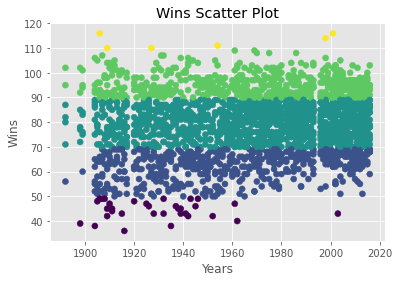

In [ ]:
#Scatter plot for the yearwise wins

plt.scatter(df['yearID'],df['W'], c=df['Win_bins'])
plt.title("Wins Scatter Plot")
plt.xlabel("Years")
plt.ylabel("Wins")
plt.show()

Looks like our binning is good - bins `[2, 3, 4]` capture the majority of data, while bins `[1, 5]` capture the extreme values (outliers).

Let's save the processed data to a CSV file so that we can re-use it in part 2.

In [ ]:
# TO BE UPDATED
#out_path = '/content/drive/My Drive/Colab Notebooks/buan6545-test/week1/baseball_analytics_pt1.csv'
out_path = '/content/drive/My Drive/Classroom/BUAN 6545: Machine Learning for Predictive Analysis 01/week1/baseball_analytics_pt1.csv'

df.to_csv(out_path)

That's all for part 1. Please make sure your sync the complete notebook to your github repo for submission.